# **Pré-Processamento**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import pickle

In [2]:
df = pd.read_csv('/home/willemromao/Downloads/TI/projetos_graduacao/ciencia_de_dados/cursos_graduacao_brasil/data/clean.csv')

In [3]:
df.head()

,NOME_CURSO,GRAU,MODALIDADE,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,MUNICIPIO,UF,REGIAO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,SITUACAO_CURSO
0,ENGENHARIA AGRONÔMICA,Bacharelado,Educação a Distância,Privada com fins lucrativos,Centro Universitário,Presidente Prudente,SP,SUDESTE,1000,4400,Em atividade
1,LETRAS,Licenciatura,Educação a Distância,Privada com fins lucrativos,Centro Universitário,Sousa,PB,NORDESTE,3000,3992,Em atividade
2,GEOGRAFIA,Licenciatura,Educação a Distância,Privada com fins lucrativos,Centro Universitário,Aracaju,SE,NORDESTE,7620,3500,Em atividade
3,EDUCAÇÃO FÍSICA,Bacharelado,Educação a Distância,Privada com fins lucrativos,Universidade,Lapa,PR,SUL,1200,3200,Em atividade
4,SERVIÇOS PENAIS,Tecnológico,Educação a Distância,Privada com fins lucrativos,Centro Universitário,Belo Jardim,PE,NORDESTE,1500,1980,Em atividade


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824759 entries, 0 to 824758
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   NOME_CURSO                824759 non-null  object
 1   GRAU                      824759 non-null  object
 2   MODALIDADE                824759 non-null  object
 3   CATEGORIA_ADMINISTRATIVA  824759 non-null  object
 4   ORGANIZACAO_ACADEMICA     824759 non-null  object
 5   MUNICIPIO                 824759 non-null  object
 6   UF                        824759 non-null  object
 7   REGIAO                    824759 non-null  object
 8   QT_VAGAS_AUTORIZADAS      824759 non-null  int64 
 9   CARGA_HORARIA             824759 non-null  int64 
 10  SITUACAO_CURSO            824759 non-null  object
dtypes: int64(2), object(9)
memory usage: 69.2+ MB


In [3]:
# Tornar feature alvo em um problema binário ao invés de multiclasse 

print("Categorias de SITUACAO_CURSO antes da transformação:")
print(df['SITUACAO_CURSO'].unique())

df = df.rename(columns={'SITUACAO_CURSO': 'EXTINTO'})

df['EXTINTO'] = df['EXTINTO'].replace(['Em extinção', 'Extinto'], 'Sim')
df['EXTINTO'] = df['EXTINTO'].replace(['Em atividade'], 'Não')  

print("\nCategorias depois da transformação:")
print(df['EXTINTO'].unique())

Categorias de SITUACAO_CURSO antes da transformação:
['Em atividade' 'Em extinção' 'Extinto']

Categorias depois da transformação:
['Não' 'Sim']


In [4]:
# Discretização de CARGA_HORARIA

bins_carga = [0, 1000, 2000, 3000, 4000, 5000, float('inf')]
labels_carga = ['Até 1000h', '1001-2000h', '2001-3000h', '3001-4000h', '4001-5000h', 'Mais de 5000h']

df['CARGA_HORARIA'] = pd.cut(
    df['CARGA_HORARIA'], 
    bins=bins_carga,
    labels=labels_carga
)

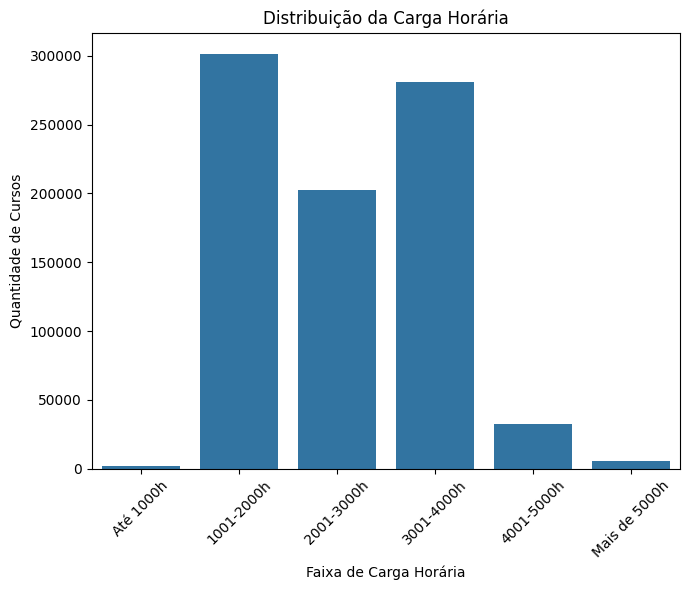

In [ ]:
# Visualizar graficamente distribuição da CARGA_HORARIA

plt.figure(figsize=(7, 6))
sns.countplot(x='CARGA_HORARIA', data=df, order=labels_carga)
plt.title('Distribuição da Carga Horária')
plt.xlabel('Faixa de Carga Horária')
plt.ylabel('Quantidade de Cursos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Quantidade de cursos por faixa de CARGA_HORARIA

df['CARGA_HORARIA'].value_counts()

CARGA_HORARIA
1001-2000h       301690
3001-4000h       280970
2001-3000h       202230
4001-5000h        32602
Mais de 5000h      5178
Até 1000h          1624
Name: count, dtype: int64

In [5]:
# Discretização de QT_VAGAS_AUTORIZADAS

bins_vagas = [0, 50, 100, 200, 500, 1000, float('inf')]
labels_vagas = ['Até 50', '51-100', '101-200', '201-500', '501-1000', 'Mais de 1000']

df['QT_VAGAS_AUTORIZADAS'] = pd.cut(
    df['QT_VAGAS_AUTORIZADAS'], 
    bins=bins_vagas,
    labels=labels_vagas
)

In [10]:
df['QT_VAGAS_AUTORIZADAS'].value_counts()

QT_VAGAS_AUTORIZADAS
Mais de 1000    481327
501-1000        157706
201-500          89386
101-200          40605
51-100           30583
Até 50           20295
Name: count, dtype: int64

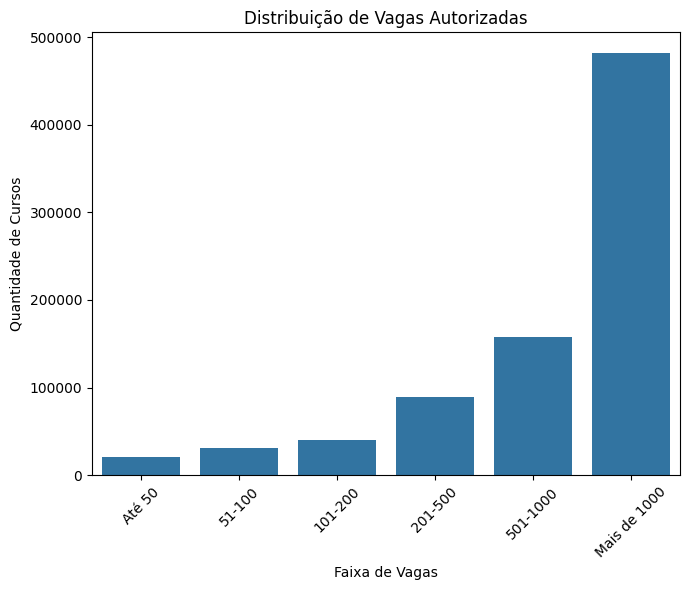

In [ ]:
# Visualizar graficamente distribuição de QT_VAGAS_AUTORIZADAS

plt.figure(figsize=(7, 6))
sns.countplot(x='QT_VAGAS_AUTORIZADAS', data=df, order=labels_vagas)
plt.title('Distribuição de Vagas Autorizadas')
plt.xlabel('Faixa de Vagas')
plt.ylabel('Quantidade de Cursos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# Verificar valores nulos

df.isnull().sum()

NOME_CURSO                     0
GRAU                           0
MODALIDADE                     0
CATEGORIA_ADMINISTRATIVA       0
ORGANIZACAO_ACADEMICA          0
MUNICIPIO                      0
UF                             0
REGIAO                         0
QT_VAGAS_AUTORIZADAS        4857
CARGA_HORARIA                465
EXTINTO                        0
dtype: int64

In [6]:
# Remover nulos

df = df.dropna()

In [14]:
# Verificar nulos após remoção

df.isnull().sum()

NOME_CURSO                  0
GRAU                        0
MODALIDADE                  0
CATEGORIA_ADMINISTRATIVA    0
ORGANIZACAO_ACADEMICA       0
MUNICIPIO                   0
UF                          0
REGIAO                      0
QT_VAGAS_AUTORIZADAS        0
CARGA_HORARIA               0
EXTINTO                     0
dtype: int64

In [7]:
# Balancemento da variável alvo com Undersampling

# Visualizar a distribuição da feature alvo antes do undersampling
print("Distribuição original:\n")
print(df['EXTINTO'].value_counts())
print()
print(df['EXTINTO'].value_counts(normalize=True))

# Separar features e target
X = df.drop('EXTINTO', axis=1)
y = df['EXTINTO']

# Aplicar Undersampling
rus = RandomUnderSampler(sampling_strategy='auto', random_state=1)
X_res_random, y_res_random = rus.fit_resample(X, y)

# Comparar distribuições antes e depois
print("\nApós balanceamento")
print(Counter(y_res_random))

# Dataframe balanceado
df = pd.concat([X_res_random.reset_index(drop=True), 
                        pd.Series(y_res_random, name='EXTINTO').reset_index(drop=True)], 
                        axis=1)

print("\nShape do DataFrame balanceado:", df.shape)

Distribuição original:

EXTINTO
Não    774923
Sim     44746
Name: count, dtype: int64

EXTINTO
Não    0.94541
Sim    0.05459
Name: proportion, dtype: float64

Após balanceamento
Counter({'Não': 44746, 'Sim': 44746})

Shape do DataFrame balanceado: (89492, 11)


In [16]:
# Verificar colunas do DataFrame

df.columns

Index(['NOME_CURSO', 'GRAU', 'MODALIDADE', 'CATEGORIA_ADMINISTRATIVA',
       'ORGANIZACAO_ACADEMICA', 'MUNICIPIO', 'UF', 'REGIAO',
       'QT_VAGAS_AUTORIZADAS', 'CARGA_HORARIA', 'EXTINTO'],
      dtype='object')

In [8]:
# Remoção de variáveis desnecessárias

print("Antes da remoção das colunas NOME_CURSO, UF e MUNICIPIO:\n")
print(df.columns)

df = df.drop(columns=['NOME_CURSO', 'UF','MUNICIPIO'])
print("\nDepois da remoção:\n")
print(df.columns)

Antes da remoção das colunas NOME_CURSO, UF e MUNICIPIO:

Index(['NOME_CURSO', 'GRAU', 'MODALIDADE', 'CATEGORIA_ADMINISTRATIVA',
       'ORGANIZACAO_ACADEMICA', 'MUNICIPIO', 'UF', 'REGIAO',
       'QT_VAGAS_AUTORIZADAS', 'CARGA_HORARIA', 'EXTINTO'],
      dtype='object')

Depois da remoção:

Index(['GRAU', 'MODALIDADE', 'CATEGORIA_ADMINISTRATIVA',
       'ORGANIZACAO_ACADEMICA', 'REGIAO', 'QT_VAGAS_AUTORIZADAS',
       'CARGA_HORARIA', 'EXTINTO'],
      dtype='object')


In [18]:
# Verificar a distribuição de valores de cada coluna

for coluna in df.columns:
    print(df[coluna].value_counts())
    print("-" * 40)

GRAU
Tecnológico                      38035
Bacharelado                      27927
Licenciatura                     23091
Sequencial                         430
Área Básica de Ingresso (ABI)        9
Name: count, dtype: int64
----------------------------------------
MODALIDADE
Educação a Distância    61190
Educação Presencial     28302
Name: count, dtype: int64
----------------------------------------
CATEGORIA_ADMINISTRATIVA
Privada com fins lucrativos    60845
Privada sem fins lucrativos    21030
Pública Federal                 3939
Pública Estadual                3044
Pública Municipal                446
Especial                         188
Name: count, dtype: int64
----------------------------------------
ORGANIZACAO_ACADEMICA
Centro Universitário                                   40755
Universidade                                           36730
Faculdade                                              11447
Instituto Federal de Educação, Ciência e Tecnologia      552
Centro Federal 

In [ ]:
# Codificação das variáveis categóricas

# Definir quais colunas são categóricas nominais e quais são ordinais
colunas_nominais = ['GRAU', 'MODALIDADE', 'CATEGORIA_ADMINISTRATIVA', 
                    'ORGANIZACAO_ACADEMICA', 'REGIAO']

colunas_ordinais = ['QT_VAGAS_AUTORIZADAS', 'CARGA_HORARIA']

# Definir as categorias ordenadas para as colunas ordinais
categorias_vagas = ['Até 50', '51-100', '101-200', '201-500', '501-1000', 'Mais de 1000']
categorias_carga = ['Até 1000h', '1001-2000h', '2001-3000h', '3001-4000h', '4001-5000h', 'Mais de 5000h']

# Criar o transformador de colunas
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, drop='first'), colunas_nominais),
        ('ordinal', OrdinalEncoder(categories=[categorias_vagas, categorias_carga]), colunas_ordinais),
    ],
    remainder='passthrough'  # manter outras colunas que não foram especificadas
)

# Tranformar a variável alvo EXTINTO para numérica
df['EXTINTO'] = df['EXTINTO'].map({'Sim': 1, 'Não': 0})

# Aplicar as transformações
X_transformed = preprocessor.fit_transform(df)

# Obter os nomes das colunas após one-hot encoding
onehot_cols = []
for i, col in enumerate(colunas_nominais):
    # Obter as categorias da coluna atual
    categories = preprocessor.transformers_[0][1].categories_[i]
    # Pular a primeira categoria que foi dropada (drop='first')
    onehot_cols.extend([f"{col}_{cat}" for cat in categories[1:]])

# Nomes das colunas ordinais
ordinal_cols = colunas_ordinais

# Nomes de outras colunas que foram mantidas
outras_colunas = [col for col in df.columns if col not in colunas_nominais and col not in colunas_ordinais]

# Criar DataFrame com as colunas transformadas
colunas_finais = onehot_cols + ordinal_cols + outras_colunas
df = pd.DataFrame(X_transformed, columns=colunas_finais, index=df.index)

# Mostrar o resultado
print("Dimensões do DataFrame transformado:", df.shape)
print("\nPrimeiras linhas do DataFrame transformado:")
print(df.head())

print("Número de colunas após a transformação:", len(df.columns))

Dimensões do DataFrame transformado: (89492, 21)

Primeiras linhas do DataFrame transformado:
   GRAU_Licenciatura  GRAU_Sequencial  GRAU_Tecnológico  \
0                1.0              0.0               0.0   
1                1.0              0.0               0.0   
2                1.0              0.0               0.0   
3                0.0              0.0               0.0   
4                1.0              0.0               0.0   

   GRAU_Área Básica de Ingresso (ABI)  MODALIDADE_Educação a Distância  \
0                                 0.0                              1.0   
1                                 0.0                              1.0   
2                                 0.0                              1.0   
3                                 0.0                              1.0   
4                                 0.0                              1.0   

   CATEGORIA_ADMINISTRATIVA_Privada com fins lucrativos  \
0                                              

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89492 entries, 0 to 89491
Data columns (total 21 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   GRAU_Licenciatura                                                          89492 non-null  float64
 1   GRAU_Sequencial                                                            89492 non-null  float64
 2   GRAU_Tecnológico                                                           89492 non-null  float64
 3   GRAU_Área Básica de Ingresso (ABI)                                         89492 non-null  float64
 4   MODALIDADE_Educação a Distância                                            89492 non-null  float64
 5   CATEGORIA_ADMINISTRATIVA_Privada com fins lucrativos                       89492 non-null  float64
 6   CATEGORIA_ADMINISTRATIVA_Privada sem fins lucrativos  

In [11]:
# Salvar DataFrame pré-processado

df.to_csv("/home/willemromao/Downloads/TI/projetos_graduacao/ciencia_de_dados/cursos_graduacao_brasil/data/preprocessed.csv", index=False)

In [12]:
# Salvar o preprocessor para uso futuro como por exemplo em pipelines de machine learning e as etapas de transformação de dados

preprocessor_path = f"/home/willemromao/Downloads/TI/projetos_graduacao/ciencia_de_dados/cursos_graduacao_brasil/models/pipelines/preprocessor.pkl"
with open(preprocessor_path, 'wb') as file:
    pickle.dump(preprocessor, file)
print(f"Preprocessor salvo em {preprocessor_path}")

Preprocessor salvo em /home/willemromao/Downloads/TI/projetos_graduacao/ciencia_de_dados/cursos_graduacao_brasil/models/pipelines/preprocessor.pkl
